<div align="center">

<table>
  <tr>
    <td><img src="./imgs/logo.jpg" alt=" Logo" width="170" /></td>

  </tr>
</table>

---

# **Practica 10**

<br>

## **Materia:**  
### Extracción de Conocimientos de Bases de Datos

<br>

## **Docente:**  
### Marco Antonio Ramírez Hernández

<br>

## **Estudiante:**  
### Luis Iván Márquez Azuara

<br>

## **Matrícula:**  
### 220401

<br>

## **Carrera:**  
### Ingeniería en Desarrollo y Gestión de Software (IDGS)

<br>

## **Grado y Grupo:**  
### 9° A

<br>

---

</div>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn as sl
import matplotlib as mpl

### 1 - Crea el dataframe con el dataset cargadp

In [3]:
df_amazon_products = pd.read_csv("amazon_products.csv", low_memory=False)

In [4]:
df_amazon_products[['name','brand','categories','reviews.rating','reviews.numHelpful']].head()

,name,brand,categories,reviews.rating,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",4.0,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,0.0


### 2- Preprocesamiento para el Analisis de Datos

In [22]:
df_clean = df_amazon_products[['reviews.rating', 'reviews.numHelpful', 'categories']].dropna()
df_clean = df_clean[df_clean['reviews.numHelpful'] >= 0] #Se mantiene solo las filas donde reviews.numHelpful >= 0
df_clean.head()

,reviews.rating,reviews.numHelpful,categories
0,5.0,0.0,"Electronics,iPad & Tablets,All Tablets,Fire Ta..."
1,5.0,0.0,"Electronics,iPad & Tablets,All Tablets,Fire Ta..."
2,5.0,0.0,"Electronics,iPad & Tablets,All Tablets,Fire Ta..."
3,4.0,0.0,"Electronics,iPad & Tablets,All Tablets,Fire Ta..."
4,5.0,0.0,"Electronics,iPad & Tablets,All Tablets,Fire Ta..."


### 3 - Normalizacion de variables, transformar los datos numericos para que este a su minima escala

In [23]:
# standardscaler para escalar variables numericas
from sklearn.preprocessing import StandardScaler

# seleccionamos las columnas numéricas que vamos a estandarizar
X = df_clean[['reviews.rating', 'reviews.numHelpful']] # reviews.numHelpful: número de votos que indican que una reseña fue útil

# Creamos el objeto escalador que normalizará los datos
scaler = StandardScaler()

# Ajustamos el escalador a los datos (fit) y transformamos (transform)
# Esto da como resultado un array donde cada columna tiene media 0 y desviación estándar 1
X_scaled = scaler.fit_transform(X)


In [24]:
# Mostramos las primeras 5 filas del array ya estandarizado.
# Cada valor ahora representa el número de desviaciones estándar
# que está por encima o por debajo de la media de su columna original.
X_scaled[:5]

array([[ 0.56780151, -0.04768978],
       [ 0.56780151, -0.04768978],
       [ 0.56780151, -0.04768978],
       [-0.80722568, -0.04768978],
       [ 0.56780151, -0.04768978]])

### 4 - Aplicar K-Means Clustering, agrupa datos al centro mas cercano, esto crea los clusters

In [28]:
# Importamos la librería warnings para gestionar advertencias
import warnings

# Ignoramos las advertencias de tipo UserWarning generadas por el módulo "joblib"
# Esto se hace para evitar mensajes innecesarios, el de wmic 
warnings.filterwarnings("ignore", category=UserWarning, module="joblib")

# Importamos el algoritmo de clustering K-means
from sklearn.cluster import KMeans

# Creamos el modelo K-means con:
# - n_clusters=4 > número de grupos a formar
# - random_state=42 > semilla para reproducibilidad de resultados
kmeans = KMeans(n_clusters=4, random_state=42)

# Ajustamos el modelo K-means a los datos estandarizados
kmeans.fit(X_scaled)

# Agregamos una nueva columna 'cluster' al DataFrame original con la etiqueta de grupo asignada a cada fila
df_clean['cluster'] = kmeans.labels_

In [29]:
df_clean[['reviews.rating', 'reviews.numHelpful', 'cluster']].head()

,reviews.rating,reviews.numHelpful,cluster
0,5.0,0.0,0
1,5.0,0.0,0
2,5.0,0.0,0
3,4.0,0.0,1
4,5.0,0.0,0


### 5 - Visualización con PCA, metodo que reduce dimenciones a solo 2 para poder dibujarlos en un plano

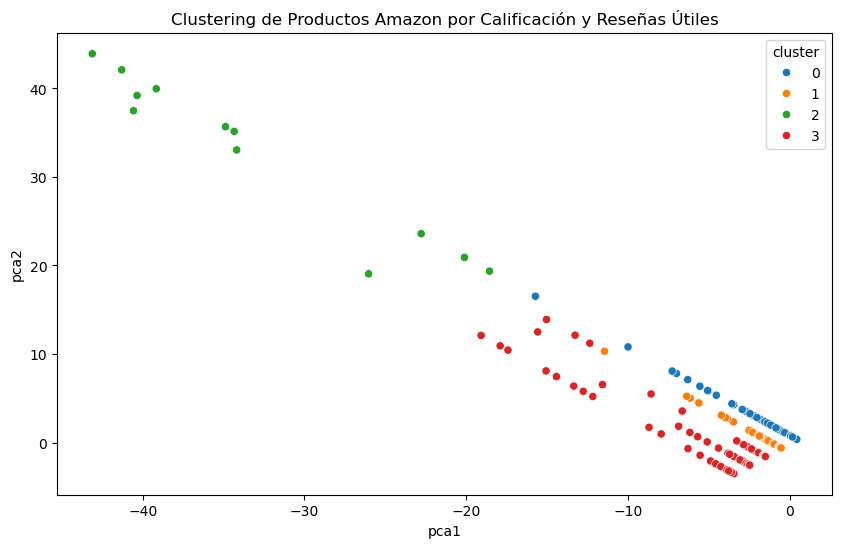

In [30]:
# Importamos PCA para reducción de dimensionalidad
from sklearn.decomposition import PCA
# Importamos seaborn para visualización estadística
import seaborn as sns
# Importamos matplotlib para gráficos
import matplotlib.pyplot as plt

# Creamos el objeto PCA para reducir los datos a 2 dimensiones (componentes principales)
pca = PCA(n_components=2)
# Ajustamos el PCA a los datos estandarizados y transformamos
pca_result = pca.fit_transform(X_scaled)

# Agregamos las dos nuevas columnas resultantes al DataFrame
df_clean['pca1'] = pca_result[:, 0]  # Primer componente principal
df_clean['pca2'] = pca_result[:, 1]  # Segundo componente principal

plt.figure(figsize=(10, 6))  # Definimos tamaño del gráfico
# Dibujamos un scatterplot (dispersión) con las dos componentes principales
# Coloreamos los puntos según el cluster asignado
sns.scatterplot(data=df_clean, x='pca1', y='pca2', hue='cluster', palette='tab10')

# Título del gráfico
plt.title("Clustering de Productos Amazon por Calificación y Reseñas Útiles")
plt.show()


### 6 -  Interpretar resultados, que significa cada grupo

#### ver los promedios por cluster


In [31]:
df_clean.groupby('cluster')[['reviews.rating', 'reviews.numHelpful']].mean()

,reviews.rating,reviews.numHelpful
cluster,,
0,5.000000,0.268575
1,4.000000,0.326844
2,4.333333,611.833333
3,2.493971,2.283609


####  Analisis por categoria


In [32]:
# Creamos una nueva columna 'main_category' a partir de la columna 'categories'
# Usamos .apply() para aplicar una función a cada fila:
# - Si categories es una cadena, separamos el texto por comas y tomamos el primer elemento > categoría principal
# - Si no es una cadena (valores nulos u otro tipo), asignamos Unknown
df_clean['main_category'] = df_clean['categories'].apply(
    lambda x: x.split(",")[0] if isinstance(x, str) else "Unknown"
)

In [33]:
# Ver las 3 categorías más comunes por cluster
df_clean.groupby('cluster')['main_category'].apply(lambda x: x.value_counts().head(3))

cluster                 
0        Fire Tablets       6681
         Stereos            4879
         Back To College    3898
1        Fire Tablets       3520
         Stereos            1408
         Back To College     945
2        Electronics           6
         Back To College       3
         Featured Brands       2
3        Fire Tablets       1042
         Stereos             321
         Back To College     210
Name: main_category, dtype: int64

## 7- Elbow Method

El método del codo (en inglés, elbow method) es una heurística utilizada en el análisis de agrupamiento, especialmente con algoritmos como K-means, para determinar el número óptimo de clústeres en un conjunto de datos. Se visualiza el gráfico de la suma de cuadrados dentro del clúster (WCSS) en función del número de clústeres y se elige el punto donde la disminución de WCSS comienza a ser menos pronunciada, formando una especie de "codo". 

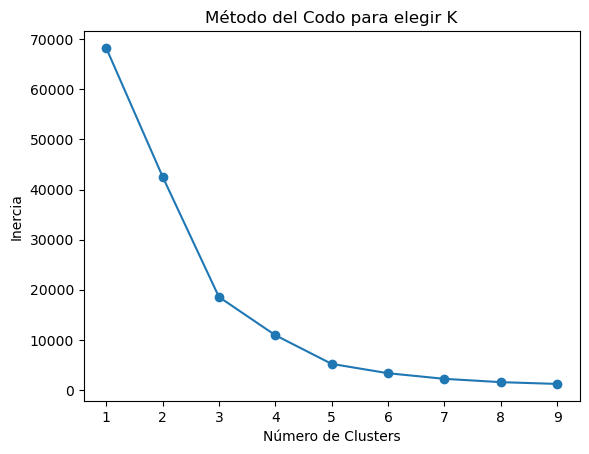

In [36]:
inertia = []

# Probamos valores de k desde 1 hasta 9
for k in range(1, 10):
    # Creamos el modelo KMeans con k clusters
    km = KMeans(n_clusters=k, random_state=42)
    # Ajustamos el modelo a los datos escalados
    km.fit(X_scaled)
    # Guardamos la inercia (medida de compactación de los clusters)
    inertia.append(km.inertia_)

# --- Visualización del Método del Codo ---
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Método del Codo para elegir K')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()